In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
df = pd.read_fwf('Sales.txt')
print(df.head())
print(df.shape)

   12.0  15.0
0  20.5  16.0
1  21.0  18.0
2  15.5  27.0
3  15.3  21.0
4  23.5  49.0
(35, 2)


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        35 non-null     float64
 1   Advertising  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes
None


In [3]:
df.columns = ['Sales','Advertising']
print(df.head())

   Sales  Advertising
0   20.5         16.0
1   21.0         18.0
2   15.5         27.0
3   15.3         21.0
4   23.5         49.0


In [14]:
x_value = df[['Sales']]
y_value = df[['Advertising']]


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=0.33, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(11, 1)
(11, 1)


In [42]:
a = reg.coef_
b = reg.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.4f}".format(rmse))

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score: {:.4f}".format(r2))

Estimated model slope, a: [[1.98396097]]
Estimated model intercept, b: (array([-21.45535484]),)
RMSE: 12.6268
R² Score: 0.1890


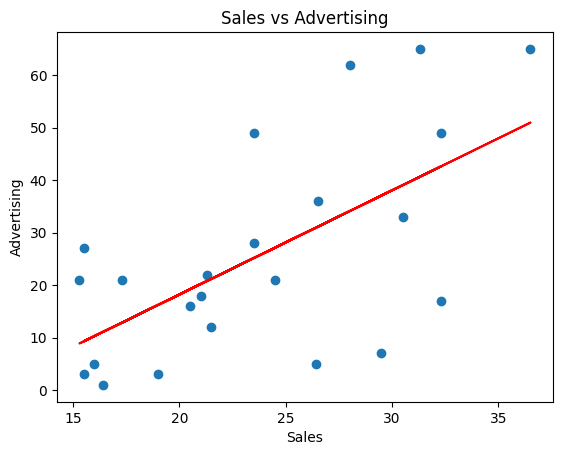

In [39]:
plt.scatter(x_train, y_train)
plt.title("Sales vs Advertising")
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.plot(x_train, reg.predict(x_train), color= 'red')

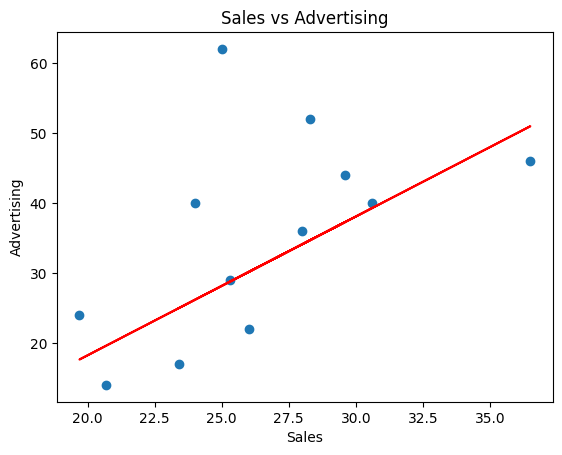

In [40]:
plt.scatter(x_test, y_test)
plt.title("Sales vs Advertising")
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.plot(x_test, reg.predict(x_test), color= 'red')

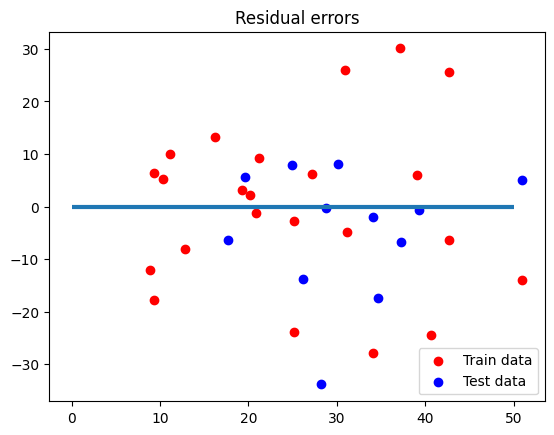

In [43]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

url = "Sales.txt"
df = pd.read_fwf(url, header=None)

df.columns = ['Sales', 'Advertising']
print(df.describe())

X = df['Sales'].values
y = df['Advertising'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)


# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b) 


lm.predict(X)[0:5]
# print(str(lm.predict(24)))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))



           Sales  Advertising
count  36.000000    36.000000
mean   24.255556    28.527778
std     6.185118    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000
Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: (array([-11.16003616]),)
RMSE value: 11.2273
R2 Score value: 0.5789


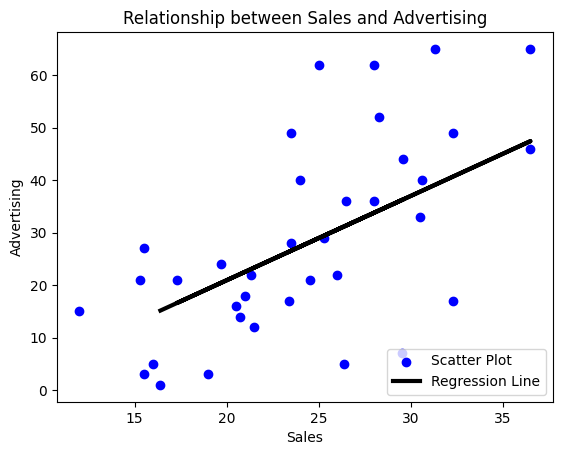

In [35]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

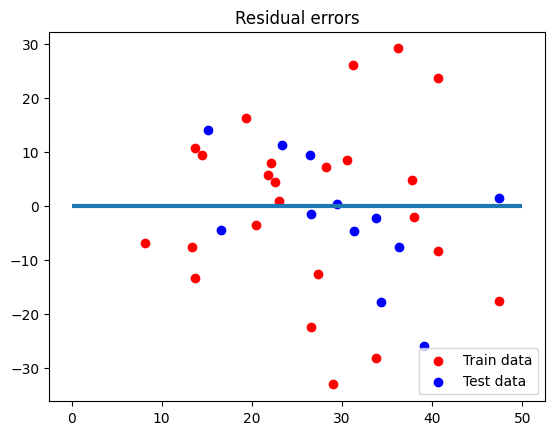

In [36]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()